14.43448806732786 lyr


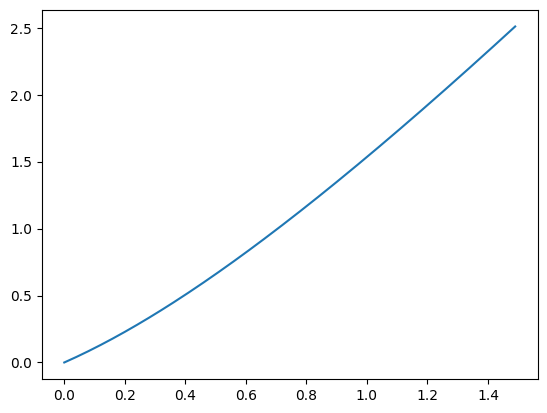

In [1]:
%matplotlib inline
import matplotlib
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, curve_fit
from scipy.stats import chisquare
from astropy.cosmology import Planck15
from astropy import constants as cc, units as uu
import parameters

DefaultSize=[10,6]
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
axis_font = {'name':'Arial', 'size':'18'}

title_font = {'name':'Arial', 'size':'18'}

def d_planck15(z):
    R0 = (cc.c)/(Planck15.H0)
    d_L = (Planck15.luminosity_distance(z))/R0.to(uu.Mpc)
    plt.plot(z, d_L)
    R0=R0.to(uu.lyr)/1e9
    return R0,d_L
z = np.arange(0.0,1.5,0.01)
R0_GLY,d_L=d_planck15(z)
R0_GLY_CMB=R0_GLY
print(R0_GLY)
HubbleGRData=pd.DataFrame()
HubbleGRData['z']=z
HubbleGRData['d']=d_L

# http://astronomy.swin.edu.au/cosmos/D/Distance+Modulus


SCPData = pd.ExcelFile(parameters.supernovaAddress + 'SCPUnionData.xlsx').parse('Sheet2')
angle=math.pi/4
# First let's create a set of lambda-shifts
z = SCPData['redshift']


# Below is the application of the theory to the usd Wil Supernova (z=1.917)

In [2]:
# Cosmological Angle
def alpha(z):
    return [math.pi/4 - math.asin(1/math.sqrt(2)/(1+x)) for x in z]
# 4D Radius of the Universe
def RofT(z):
    a = alpha(z)
    return [math.cos(x) - math.sin(x) for x in a]
# Distance to the Epoch
def DistanceOfT(z):
    d= 13.58
    return [(1-x)*d for x in RofT(z)]

Size in Inches [6. 6.]


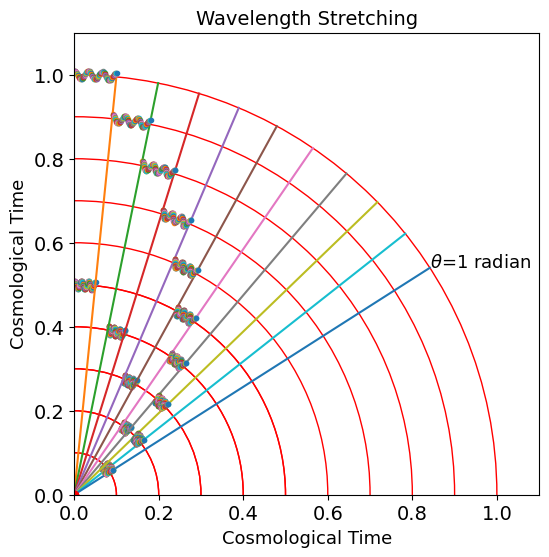

In [3]:
DefaultSize=[6,6]

font = {
        'weight' : 'regular',
        'size'   : 14}

matplotlib.rc('font', **font)
title_font = {'name':'DejaVu Sans', 'size':'14'}

axis_font = {'name':'DejaVu Sans', 'size':'13'}
label_font = {'name':'DejaVu Sans', 'size':'13'}
fig, ax = plt.subplots()  
fig.set_size_inches( DefaultSize )# resetthe size
Size = fig.get_size_inches()
print ("Size in Inches", Size)
# print(radius)
plt.axis([0, 1.1, 0, 1.1])
plt.plot([0,0],[0,1.1])


def plotAncientPhotons(fig, ax, n=10, rays=False):
    # define radiuses
    radius = [x/10 for x in range(n+1)]
    thetas = [x/n for x in range(1,n+1)]
# Create the circles
    for i in range(0,n+1):
        rad=i/10
        ax.add_artist(plt.Circle(xy=(0,0),radius=rad, color='r', fill=False)) 
        
# create the meridians
    if rays:
        for i in range(0,n):
            r=n/10
            x1=[r*np.sin(thetas[i]),r*np.cos(thetas[i])]
            plt.plot([0,x1[0]],[0,x1[1]] )
            
# Create the sinusoidals
    for j in range(0, n):
        x=[]
        y=[]
        miniangle=np.linspace(0,6*np.pi,100)
        miniangletheta=np.linspace(0,0.1,100)
        angle=1-thetas[j]+miniangletheta
        rad=radius[j+1]+0.01*np.cos(miniangle)
        x.append(rad*np.sin(angle))
        y.append(rad*np.cos(angle))
        plt.plot(x,y,".")
    return ax
            
 
ax=plotAncientPhotons(fig, ax, n=5)   
ax=plotAncientPhotons(fig, ax, n=10, rays=True)   

ax.plot([0,0],[0,0],'ro')
ax.set_xlabel("Cosmological Time", **label_font)
ax.set_ylabel("Cosmological Time", **label_font)
ax.set_title("Wavelength Stretching", fontdict=title_font)
plt.text(np.sin(1),np.cos(1), r'$\theta$=1 radian', **axis_font)
ax.ticklabel_format(style='sci', axis='x') 
ax.ticklabel_format(style='sci', axis='y') 
plt.savefig(parameters.imgAddress + "WavelengthStretching.png", dpi=200)

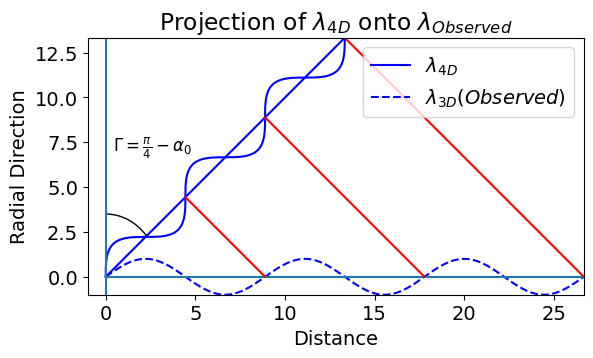

In [4]:
# jupyterlab_vim
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Define the rotation matrix for 45 degrees anticlockwise
def rotation_matrix(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s], [s, c]])

# Create the rotation matrix for 45 degrees (pi/4 radians)
alpha = 0
theta = np.pi/4 - np.radians(alpha)
rot_matrix = rotation_matrix(theta)

# Define the figure and axis
fig, ax = plt.subplots()

n=6
# Define the range for the plot
x = np.linspace(0, n*np.pi, 400)
y_sin = np.sin(x)

# Apply the rotation matrix to the sinusoidal curve
xy_original = np.vstack((x, y_sin))
xy_rotated = np.dot(rot_matrix, xy_original)
# Plot the original sinusoidal curve for reference (dashed blue line)
ax.plot(xy_rotated[0], xy_rotated[1], label='$\\lambda_{4D}$', color='blue', linestyle='-')

# Apply the rotation matrix to the sinusoidal curve
xy_original = np.vstack((x, y_sin*0.0))
xy_rotated = np.dot(rot_matrix, xy_original)
# Plot the original sinusoidal curve for reference (dashed blue line)
ax.plot(xy_rotated[0], xy_rotated[1], color='blue', linestyle='-')

# Plot the original sinusoidal curve for reference (dashed blue line)
ax.plot(x/np.cos(theta), y_sin, label='$\\lambda_{3D} (Observed)$', color='blue', linestyle='--')

ax.hlines(y=0, xmin=0, xmax=n*np.pi/np.cos(theta))
ax.vlines(x=0, ymin=-1, ymax=2*n*np.pi/np.cos(theta))


# Drawing lines at n*2*pi crossings
for n in range(1, int(n/2)+1):  # Adjust range of n as needed
    cross_x = n * 2 * np.pi
    cross_y = 0
    cross_point_rotated = np.dot(rot_matrix, np.array([cross_x, cross_y]))
    
    # Draw line for the rotated sinusoidal
    ax.plot([cross_x/np.cos(theta), cross_point_rotated[0]], [cross_y, cross_point_rotated[1]], color='red')
    
#     # Draw horizontal line for the original sinusoidal
#     ax.plot([cross_x, cross_x], [0, np.sin(cross_x)], color='green')




# Set the same scaling for both axes
# ax.axis('equal')

# Set the limit for better visualization
plt.xlim(-1, 2*(n)*np.pi/np.cos(theta))
plt.ylim(-1, (n)*np.pi/np.cos(theta))
# plt.ylim(-1, 2*(n)*np.pi)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Radial Direction')
plt.title('Projection of $\\lambda_{4D}$ onto $\\lambda_{Observed}$')

# Annotate the angle (pi/4 - alpha)
ax.annotate(r'$ \Gamma = \frac{\pi}{4} - \alpha_0$', 
             xy=(0, 0), 
             xytext=(5, 90), 
             textcoords='offset points',
#              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.5"),
             fontsize=12)


# Annotate the angle (pi/4 - alpha) with an arc
arc = patches.Arc((0, 0),  # Center point
                  6,       # Width
                  7,       # Height
                  theta1=45-alpha,        # Starting angle
                  theta2=90,  # Ending angle
                  color='black',
                  linewidth=1)
ax.add_patch(arc)


# Add a legend
ax.set_aspect('equal')
plt.legend()
plt.savefig("./Drawing_For_Publications/LightPropagationin4D.png")
# Show the plot
plt.show()


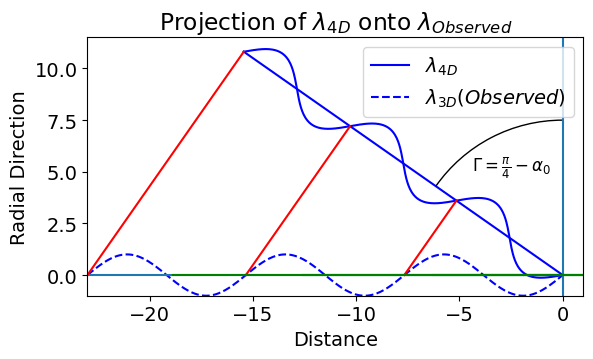

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Define the rotation matrix for 45 degrees anticlockwise
def rotation_matrix(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s], [s, c]])

# Create the rotation matrix for 45 degrees (pi/4 radians)
alpha = 10
theta = np.pi/4 - np.radians(alpha)
rot_matrix = rotation_matrix(-theta)

# Define the figure and axis
fig, ax = plt.subplots()

n=6
# Define the range for the plot
x = np.linspace(-n*np.pi,0, 400)
y_sin = np.sin(x)
y_h_line = y_sin*0


# Apply the rotation matrix to the sinusoidal curve
xy_original = np.vstack((x, y_sin))
xy_rotated = np.dot(rot_matrix, xy_original)
# Plot the original sinusoidal curve for reference (dashed blue line)
ax.plot(xy_rotated[0], xy_rotated[1], label='$\\lambda_{4D}$', color='blue', linestyle='-')

# Apply the rotation matrix to the h_line curve
xy_original = np.vstack((x, y_h_line))
xy_rotated = np.dot(rot_matrix, xy_original)
# Plot the original sinusoidal curve for reference (dashed blue line)
ax.plot(xy_rotated[0], xy_rotated[1], color='blue', linestyle='-')

# Plot the original sinusoidal curve for reference (dashed blue line)
ax.plot(x/np.cos(theta), y_sin, label='$\\lambda_{3D} (Observed)$', color='blue', linestyle='--')

ax.hlines(y=0, xmin=0, xmax=-n*np.pi/np.cos(theta))
ax.vlines(x=0, ymin=-1, ymax=2*n*np.pi/np.cos(theta))


# Drawing lines at n*2*pi crossings
for n in range(1, int(n/2)+1):  # Adjust range of n as needed
    cross_x = -n * 2 * np.pi
    cross_y = 0
    cross_point_rotated = np.dot(rot_matrix, np.array([cross_x, cross_y]))
    
    # Draw line for the rotated sinusoidal
    ax.plot([cross_x/np.cos(theta), cross_point_rotated[0]], [cross_y, cross_point_rotated[1]], color='red')
    
    # Draw horizontal line for the original sinusoidal
    ax.plot([-cross_x, cross_x], [0, np.sin(cross_x)], color='green')

# Set the limit for better visualization
plt.xlim(-2*(n)*np.pi/np.cos(theta), 1)  # Adjusted for the negative x values
plt.ylim(-1, (n)*np.pi/np.cos(theta))

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Radial Direction')
plt.title('Projection of $\\lambda_{4D}$ onto $\\lambda_{Observed}$')

# Annotate the angle (pi/4 - alpha)
ax.annotate(r'$ \Gamma =  \frac{\pi}{4} - \alpha_0$', 
             xy=(0, 0), 
             xytext=(-65, 75), 
             textcoords='offset points',
#              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.5"),
             fontsize=12)


# Annotate the angle (pi/4 - alpha) with an arc
arc = patches.Arc((0, 0),  # Center point
                  15,       # Width
                  15,       # Height
                  theta1=90,        # Starting angle
                  theta2=135+alpha,  # Ending angle
                  color='black',
                  linewidth=1)
ax.add_patch(arc)
ax.set_aspect('equal')

# Add a legend
plt.legend()
plt.savefig("./Drawing_For_Publications/LightPropagationin4D_left.png")
# Show the plot
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def rotation_matrix(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s], [s, c]])

def plotme(ax, theta, wavelength, label="", periods=3):
    # Convert theta from degrees to radians for np functions
    theta_rad = np.radians(theta+90)
    
    # Create a rotation matrix for the given angle
    rot_matrix = rotation_matrix(theta_rad)

    # Define the range and calculate the sinusoidal values
    x = np.linspace(0, periods * wavelength, 1000)
    y = np.sin(2 * np.pi * x / wavelength)

    # Find the crossing points on the x-axis (where y = 0)
    crossing_points = [(n * wavelength, 0) for n in range(periods + 1)]

    # Rotate the crossing points
    rotated_crossing_points = [np.dot(rot_matrix, point) for point in crossing_points]

    # Rotate the sinusoidal curve
    xy_original = np.vstack((x, y))
    xy_rotated = np.dot(rot_matrix, xy_original)

    # Plot the rotated sinusoidal curve
    ax.plot(xy_rotated[0], xy_rotated[1], label=label)
    
    # Plot the crossing points
    for point in rotated_crossing_points:
        ax.plot(point[0], point[1], 'ro')  # 'ro' is the marker style for red circles

    # Draw the segment along the same angle as the sinusoid
    segment_end = rotated_crossing_points[-1]
    ax.plot([0, segment_end[0]], [0, segment_end[1]], 'k-')  # 'k-' is the style for a black line

    # Return the rotated crossing points
    return rotated_crossing_points

def draw_lines(rotated_crossing_points_1, rotated_crossing_points_2, ax,  linestyle="--"):
    # Draw lines between vertical and inclined sinusoid crossing points
    for p1, p2 in zip(rotated_crossing_points_1, rotated_crossing_points_2):
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'orange', linestyle='--')  # Draw line with orange color

def createPlot(alpha, fig, ax):
    # Example usage:
    theta = 45 -alpha
    lambda_r = 2 * np.pi
    lambda_light = lambda_r / np.cos(np.radians(theta))
    lambda_light_x = lambda_light/np.sin(np.radians(theta))
    
    label=f'Transition Dipole Oscillation'
    rotated_crossing_points_vertical = plotme(ax, 0, lambda_r, label=label)  # Plot a sinusoid with a wavelength of 2pi
    
    label=f'Light Propagation in 4D'
    rotated_crossing_points_inclined = plotme(ax, theta, lambda_light, label=label)  # Plot a sinusoid at a 45-degree angle with adjusted wavelength
    draw_lines(rotated_crossing_points_vertical, rotated_crossing_points_inclined, ax, linestyle="--")
    
    label=f'Light Propagation as seen in 3D'
    rotated_crossing_points_horizontal = plotme(ax, 90, lambda_light_x, label=label)  # Plot a sinusoid at a 45-degree angle with adjusted wavelength
    draw_lines(rotated_crossing_points_horizontal, rotated_crossing_points_inclined, ax, linestyle=".")
    
    # Set plot labels and title
    ax.set_xlabel('3D-Distance')
    ax.set_ylabel('Radial Direction Distance')
    ax.set_title(f'Light Propagation in 4D at {theta} degrees')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(True)
     # Set aspect of the plot to be equal
    ax.set_aspect('equal')
    ax.set_xlim([-50,1])
    ax.set_ylim([-1,20])




for alpha in np.arange(20, -1,-1):  # Corrected to decrement from 30 to 5
    theta = 45 - alpha 
    fig, ax = plt.subplots()
    createPlot(alpha, fig, ax)
    plt.savefig(f"./ChangingRedshift/LightPropagationin4D_{theta}degrees.png", bbox_inches='tight')
    plt.close(fig)  # Close the figure after saving to free memory

